In [1]:
from astropy.table import Table
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dict = {}
step = 0.01

for hour in range(12, 16):
    fp = f'glg_tte_b0_170914_{hour:02d}z_v00.fit.gz'

    energy_bands = Table.read(fp, hdu=1)
    table = Table.read(fp, hdu=2)
    time = Table.read(fp, hdu=3)
    #this is about an hour of data
    df = table.to_pandas()
    #df
    grb_counts = df['TIME'] - df.loc[0, 'TIME']

    bins = np.arange(0, 3600, step)
    bin_map = pd.cut(grb_counts, bins=bins).apply(lambda I: I.left)
    bin_series = pd.DataFrame(bin_map).dropna()
    bin_series['count'] = 1
    d = bin_series.groupby("TIME")["count"].count()
    data_dict[hour]=d

data_full = pd.concat(list(data_dict.values())).reset_index(drop=True)
count_times = data_full.index * pd.to_timedelta(step, "s") + pd.to_datetime("2017-09-13 12:00:00.000")
data_full.index = count_times
data_full[data_full==0]=np.nan

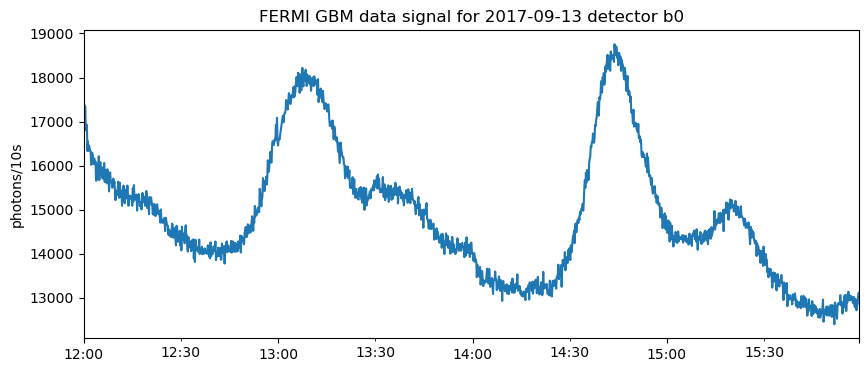

In [5]:

plt.figure(figsize=(10, 4))
data_full.plot()
plt.title("FERMI GBM data signal for 2017-09-13 detector b0")
plt.ylabel("photons/10s")
plt.savefig("correlation_signal", dpi=200)

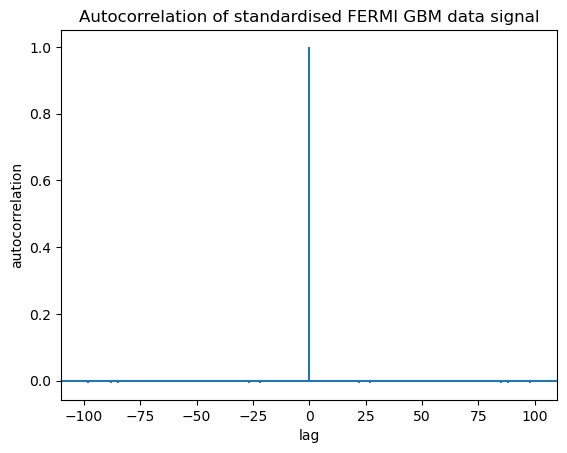

<Figure size 640x480 with 0 Axes>

In [10]:
s = np.sqrt(data_full)
t = s - s.rolling(500, center=True).mean()
plt.acorr(t.dropna(), maxlags = 100)
plt.title("Autocorrelation of standardised FERMI GBM data signal")
plt.ylabel("autocorrelation")
plt.xlabel("lag")
plt.show()
plt.savefig("correlation_plot", dpi=200)

In [3]:
data_full.to_csv("fermi_background.csv")
data_full.head()

2017-09-13 12:00:00.000     NaN
2017-09-13 12:00:00.010     NaN
2017-09-13 12:00:00.020     9.0
2017-09-13 12:00:00.030     7.0
2017-09-13 12:00:00.040    14.0
Name: count, dtype: float64